In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm
import cv2
from joblib import delayed,Parallel
import pandas as pd

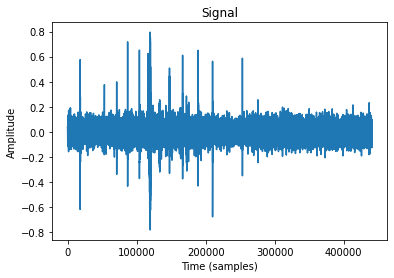

In [2]:
y, sr = librosa.load('../data/ff1010bird/audio/wav/100.wav', sr = None)
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

## check the SR consistency

In [23]:
file_list = [i for i in os.listdir('../data/ff1010bird/audio/wav/') if 'wav' in i]

ACTUAL_SR = 44100

for i in tqdm(file_list):
    y, sr = librosa.load(f'../data/ff1010bird/audio/wav/{i}', sr = None)
    if ACTUAL_SR != sr:
        print('issue ',i)
    if len(y) != ACTUAL_SR*10:
        print('len is less',i)

100%|█████████████████████████████████████| 7690/7690 [00:03<00:00, 2542.25it/s]


In [13]:
file_list = [i for i in os.listdir('../data/warblrb10k_public/audio/wav/') if 'wav' in i]

ACTUAL_SR = 44100
greater = 0
lesser = 0
for i in tqdm(file_list):
    y, sr = librosa.load(f'../data/warblrb10k_public/audio/wav/{i}', sr = None)
    #print(sr)
    #if ACTUAL_SR != sr:
    #    print('issue ',i)
    if len(y) >= ACTUAL_SR*10:
        greater += 1
    else:
        lesser += 1

100%|██████████████████████████████████████| 8000/8000 [00:39<00:00, 201.96it/s]


In [14]:
print(greater, lesser)

7591 409


## Now lets try the librosa melspec

44100


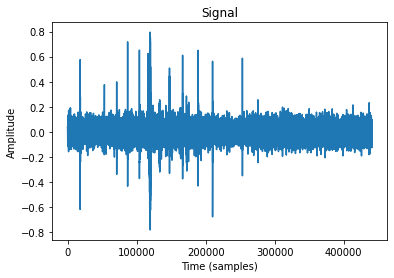

In [11]:
y, sr = librosa.load('../data/ff1010bird/audio/wav/100.wav', sr = None)
print(sr)
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

/tmp/ipykernel_463/4061504652.py:7: FutureWarning: Pass y=[-0.00549316 -0.00863647 -0.01123047 ... -0.02670288 -0.02536011
 -0.01358032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)


(128, 862)
0.0
-80.0


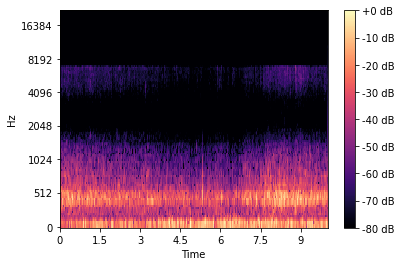

In [6]:
n_fft = 1024
hop_length = 512
n_mels = 128

y, sr = librosa.load('../data/ff1010bird/audio/wav/87.wav', sr = None)

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel',);
plt.colorbar(format='%+2.0f dB')

print(S_DB.shape)
print(S_DB.max())
print(S_DB.min())

In [20]:
## convert to jpg

### convert the range to 0, 255
NewMax = 255.
NewMin = 0.
S_DB = (((S_DB - S_DB.min()) * (NewMax - NewMin)) / (S_DB.max() - S_DB.min())) + NewMin



In [21]:
print(S_DB.shape)
print(S_DB.max())
print(S_DB.min())

(128, 862)
255.0
0.0


In [23]:
S_DB

array([[117.99165, 130.50304, 134.99974, ..., 221.80647, 197.2296 ,
        202.20482],
       [124.28689, 141.66512, 140.56729, ..., 223.91162, 201.76022,
        199.33011],
       [134.49016, 154.40433, 150.25432, ..., 230.32034, 210.62427,
        195.498  ],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)

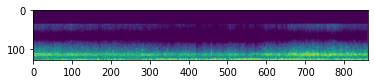

In [24]:
plt.imshow(np.flipud(S_DB))

## All put for jpg image 

In [11]:
n_fft = 1024
hop_length = 512
n_mels = 128
NewMax = 255.
NewMin = 0.

DATASET_TYPE = 'ff1010bird'

y, sr = librosa.load(f'../data/{DATASET_TYPE}/audio/wav/87.wav', sr = None)

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)
S_DB = librosa.power_to_db(S, ref=np.max)
S_DB = (((S_DB - S_DB.min()) * (NewMax - NewMin)) / (S_DB.max() - S_DB.min())) + NewMin
S_DB = np.flipud(S_DB)
image = np.dstack([S_DB,S_DB,S_DB])
image = image.astype(np.uint8)

cv2.imwrite(f'../data/librosa/v1/{DATASET_TYPE}/87.jpg',image)

/tmp/ipykernel_2830/447687821.py:11: FutureWarning: Pass y=[-0.00549316 -0.00863647 -0.01123047 ... -0.02670288 -0.02536011
 -0.01358032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)


True

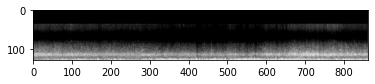

In [9]:
plt.imshow(image)

## lets iterate through

In [9]:
DATASET_TYPE = 'ff1010bird'

IMAGE_SHAPE = 512
n_fft = 1024
hop_length = 512
n_mels = 128
NewMax = 255.
NewMin = 0.

file_list = [i for i in os.listdir(f'../data/{DATASET_TYPE}/audio/wav/') if 'wav' in i]

def image_creation(file,):
    
    y, sr = librosa.load(f'../data/{DATASET_TYPE}/audio/wav/{file}', sr = None)

    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)
    S_DB = librosa.power_to_db(S, ref=np.max)
    S_DB = (((S_DB - S_DB.min()) * (NewMax - NewMin)) / (S_DB.max() - S_DB.min())) + NewMin
    S_DB = np.flipud(S_DB)
    image = np.dstack([S_DB,S_DB,S_DB])
    image = image.astype(np.uint8)
    filename = file.split('.')[0] 
    image = cv2.resize(image,[IMAGE_SHAPE, IMAGE_SHAPE])
    cv2.imwrite(f'../data/librosa/v1/{DATASET_TYPE}/{filename}.jpg',image)
    
Parallel(n_jobs=-1, verbose=1)(
    delayed(image_creation)(
    file,
    ) for file in file_list#[:5]
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:    3.8s
/tmp/ipykernel_463/2029815651.py:16: FutureWarning: Pass y=[ 0.04663086  0.06167603  0.05041504 ... -0.13549805 -0.1473999
 -0.14883423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_463/2029815651.py:16: FutureWarning: Pass y=[ 0.06521606  0.09692383  0.09655762 ... -0.08425903 -0.0690918
 -0.03137207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_463/2029815651.py:16: FutureWarning: Pass y=[ 0.06558228  0.07635498  0.06481934 ...  0.01196289  0.00317383
 -0.00619507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_463/2029815651.py:1

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [5]:
## just a small change is required here 
## some of the data are less than 10 sec . so we will remove them for now 

DATASET_TYPE = 'warblrb10k_public'

IMAGE_SHAPE = 512
n_fft = 1024
hop_length = 512
n_mels = 128
NewMax = 255.
NewMin = 0.

file_list = [i for i in os.listdir(f'../data/{DATASET_TYPE}/audio/wav/') if 'wav' in i]

def image_creation(file,):
    
    y, sr = librosa.load(f'../data/{DATASET_TYPE}/audio/wav/{file}', sr = None)
    if len(y) >= sr*10:
        #continue
        y = y[:sr*10]
        S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels,win_length=None)
        S_DB = librosa.power_to_db(S, ref=np.max)
        S_DB = (((S_DB - S_DB.min()) * (NewMax - NewMin)) / (S_DB.max() - S_DB.min())) + NewMin
        S_DB = np.flipud(S_DB)
        image = np.dstack([S_DB,S_DB,S_DB])
        image = image.astype(np.uint8)
        filename = file.split('.')[0] 
        image = cv2.resize(image,[IMAGE_SHAPE, IMAGE_SHAPE])
        cv2.imwrite(f'../data/librosa/v1/{DATASET_TYPE}/{filename}.jpg',image)
    
Parallel(n_jobs=-1, verbose=1)(
    delayed(image_creation)(
    file,
    ) for file in file_list#[:5]
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.7s
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[-0.01800537 -0.01568604 -0.01235962 ...  0.00357056  0.00372314
  0.00372314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[-0.0770874  -0.0670166  -0.04025269 ...  0.05361938 -0.0234375
  0.02011108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -8.9019775e-02
 -8.5632324e-02 -7.6873779e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[ 0.          0.  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## lets make the tf record of the librosa

In [6]:
import os, json, random
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf, re, math
from tqdm import tqdm

In [7]:
DATATYPE = 'ff1010bird'
main_df = pd.read_csv('../data/ff1010bird/ff1010bird_metadata_2018_correction_binary_v1.csv')
main_df.head()

itemid   datasetid  hasbird  fold
0   42805  ff1010bird        0     5
1   40130  ff1010bird        0     4
2   32261  ff1010bird        1     7
3  140825  ff1010bird        0     2
4  107522  ff1010bird        0     6

In [8]:
def get_fold(fold):
    val_df = main_df[main_df.fold==fold].reset_index(drop=True)
    return val_df

In [10]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_example(image,image_name,target):
    feature = {
        'image': _bytes_feature(image),
        'image_name': _bytes_feature(image_name),
        'target': _int64_feature(target),

      }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

In [11]:
def create_tf_records(fold = 0):
    df = get_fold(fold)
    tfr_filename = f'../data/tfrec/v3/happywhale-ff-2022-train-{fold}-{df.shape[0]}.tfrec'
    with tf.io.TFRecordWriter(tfr_filename) as writer:
        for i,row in tqdm(df.iterrows()):
            itemid = row.itemid
            target = row.hasbird
            image_path = f"../data/librosa/v1/{DATATYPE}/{itemid}.jpg"
            image = tf.io.read_file(image_path)
            #audio, sample_rate = tf.audio.decode_wav(audio,
            #                                 desired_channels=-1,
            #                                 desired_samples=-1)
            image_name = str.encode(str(itemid))
            example = serialize_example(image,image_name,target)
            writer.write(example)

In [12]:
for i in range(8):
    create_tf_records(fold = i)

0it [00:00, ?it/s]2022-04-25 14:44:26.573699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 14:44:26.741807: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 14:44:26.742486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 14:44:26.746624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-25 14:44:26.747232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successfu

## lets visualize

In [13]:
def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image,IMAGE_SIZE_)
    return image

def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "image_name": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        'target': tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = example['target']
    return image, label # returns a dataset of (image, label) pairs

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.prefetch(AUTO) # prefetch next batch while training (autotune prefetch buffer size)
    return dataset

def count_data_items(filenames):
    # the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [14]:
# numpy and matplotlib defaults
np.set_printoptions(threshold=15, linewidth=80)
CLASSES = [0,1]

def batch_to_numpy_images_and_labels(data):
    images, labels = data
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    #if numpy_labels.dtype == object: # binary string in this case, these are image ID strings
    #    numpy_labels = [None for _ in enumerate(numpy_images)]
    # If no labels, only image IDs, return None for labels (this is the case for test data)
    return numpy_images, numpy_labels

def display_single_sample(image, label, subplot, red=False, titlesize=16):
    plt.subplot(*subplot)
    plt.axis('off')
    plt.imshow(image)
    title = str(label)
    if len(title) > 0:
        plt.title(title, fontsize=int(titlesize) if not red else int(titlesize/1.2), color='red' if red else 'black', fontdict={'verticalalignment':'center'}, pad=int(titlesize/1.5))
    return (subplot[0], subplot[1], subplot[2]+1)
    
def display_batch_of_images(databatch):
    """
    Display single batch Of images 
    """
    # data
    images, labels = batch_to_numpy_images_and_labels(databatch)
    if labels is None:
        labels = [None for _ in enumerate(images)]
        
    # auto-squaring: this will drop data that does not fit into square or square-ish rectangle
    rows = int(math.sqrt(len(images)))
    cols = len(images)//rows
        
    # size and spacing
    FIGSIZE = 13.0
    SPACING = 0.1
    subplot=(rows,cols,1)
    if rows < cols:
        plt.figure(figsize=(FIGSIZE,FIGSIZE/cols*rows))
    else:
        plt.figure(figsize=(FIGSIZE/rows*cols,FIGSIZE))
    
    # display
    for i, (image, label) in enumerate(zip(images[:rows*cols], labels[:rows*cols])):
        correct = True
        dynamic_titlesize = FIGSIZE*SPACING/max(rows,cols)*40+3 # magic formula tested to work from 1x1 to 10x10 images
        subplot = display_single_sample(image, label, subplot, not correct, titlesize=dynamic_titlesize)
    
    #layout
    plt.tight_layout()
    if label is None and predictions is None:
        plt.subplots_adjust(wspace=0, hspace=0)
    else:
        plt.subplots_adjust(wspace=SPACING, hspace=SPACING)
    plt.show()

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

8
7690


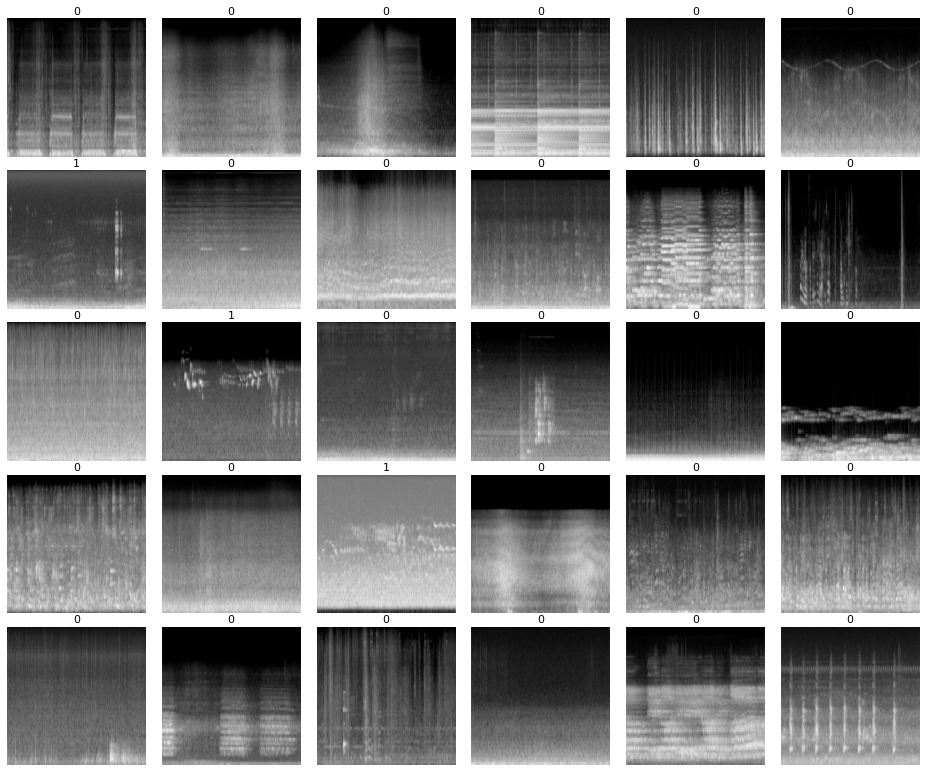

In [17]:
IMAGE_SIZE_ = [IMAGE_SIZE,IMAGE_SIZE]
AUTO = tf.data.experimental.AUTOTUNE
TRAINING_FILENAMES = tf.io.gfile.glob(f'../data/tfrec/v3/happywhale-ff-2022-train*.tfrec')
print(len(TRAINING_FILENAMES))
dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
dataset = dataset.repeat()
dataset = dataset.shuffle(2048)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(AUTO) #This dataset can directly be passed to keras.fit method
print(count_data_items(TRAINING_FILENAMES))

# Displaying single batch of TFRecord
train_batch = iter(dataset)
display_batch_of_images(next(train_batch))

## now warblrb10k_public need a small change as the time is less thatn 10 sec for some videos

In [29]:
DATASET_TYPE = 'warblrb10k_public'
file_10_sec_list = [ i for i in os.listdir(f'../data/librosa/v1/{DATASET_TYPE}') if 'jpg' in i]
print(len(file_10_sec_list))

def rem(x):
    return x.replace('.jpg','')

print(file_10_sec_list[:3])
file_10_sec_list = list(map(rem,file_10_sec_list))
print(file_10_sec_list[:3])

7591
['1d1fdf57-f12b-46c8-b533.jpg', '923eb21b-3bf4-45c8-a8e3.jpg', '7a39e764-edb5-4995-8dfe.jpg']
['1d1fdf57-f12b-46c8-b533', '923eb21b-3bf4-45c8-a8e3', '7a39e764-edb5-4995-8dfe']


In [18]:
main_df = pd.read_csv('../data/warblrb10k_public/warblrb10k_clean_correction_binary_v1.csv')
print(main_df.shape)
main_df = main_df[main_df['itemid'].isin(file_10_sec_list)]
print(main_df.shape)
main_df.head()

(7591, 3)


NameError: name 'file_10_sec_list' is not defined

In [32]:
main_df.to_csv('../data/warblrb10k_public/warblrb10k_clean.csv',index = False) # removed samples that are less than 10 sec

In [19]:
from sklearn.model_selection import StratifiedKFold
main_df = pd.read_csv('../data/warblrb10k_public/warblrb10k_clean_correction_binary_v1.csv')
SEED = 1
FOLDS = 8

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)

main_df['fold'] = -1
for fold,(idxT,idxV) in enumerate( skf.split(main_df,main_df['hasbird'].values)):
    main_df['fold'][idxV] = fold

/tmp/ipykernel_568/1887173369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['fold'][idxV] = fold
/tmp/ipykernel_568/1887173369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['fold'][idxV] = fold
/tmp/ipykernel_568/1887173369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['fold'][idxV] = fold
/tmp/ipykernel_568/1887173369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [20]:
main_df.head()

datasetid     itemid  hasbird  fold
0  warblrb10k  00017_war        1     4
1  warblrb10k  00048_war        1     0
2  warblrb10k  00103_war        1     7
3  warblrb10k  00369_war        1     4
4  warblrb10k  00431_war        1     3

In [21]:
DATATYPE = 'warblrb10k_public'

def create_tf_records(fold = 0):
    df = get_fold(fold)
    tfr_filename = f'../data/tfrec/v3/happywhale-war-2022-train-{fold}-{df.shape[0]}.tfrec'
    with tf.io.TFRecordWriter(tfr_filename) as writer:
        for i,row in tqdm(df.iterrows()):
            itemid = row.itemid
            target = row.hasbird
            image_path = f"../data/librosa/v1/{DATATYPE}/{itemid}.jpg"
            image = tf.io.read_file(image_path)
            #audio, sample_rate = tf.audio.decode_wav(audio,
            #                                 desired_channels=-1,
            #                                 desired_samples=-1)
            image_name = str.encode(str(itemid))
            example = serialize_example(image,image_name,target)
            writer.write(example)

In [22]:
for i in range(8):
    create_tf_records(fold = i)

949it [00:00, 3615.55it/s]
949it [00:00, 4241.79it/s]
949it [00:00, 4273.39it/s]
949it [00:00, 4146.74it/s]
949it [00:00, 4088.46it/s]
949it [00:00, 4263.15it/s]
949it [00:00, 4223.14it/s]
948it [00:00, 4262.52it/s]


8
7591


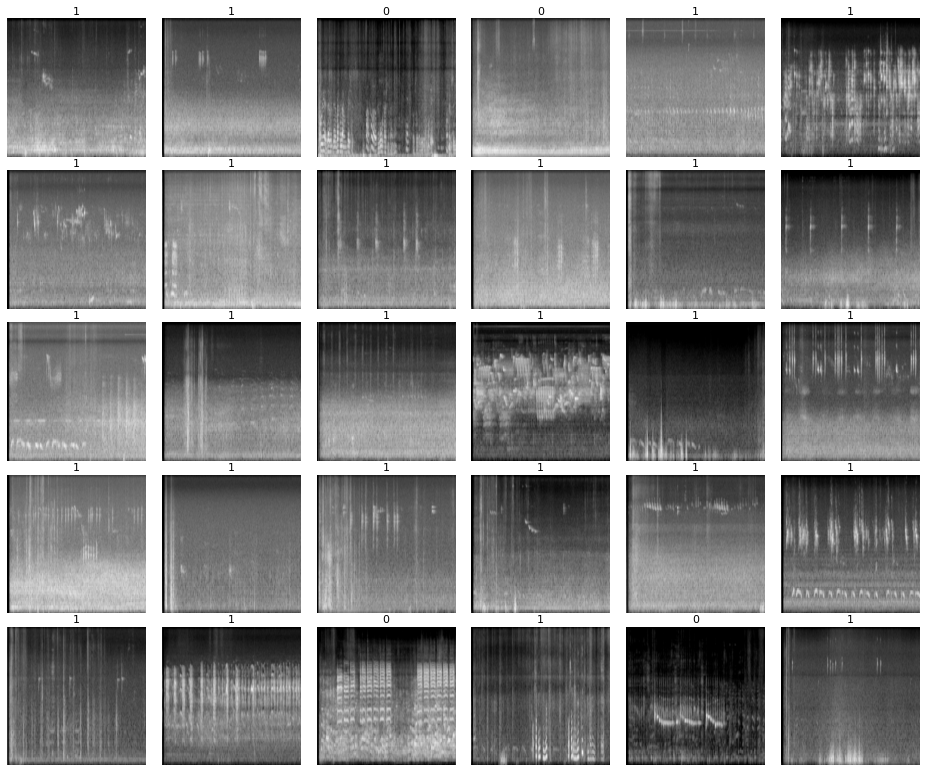

/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[-0.00436401 -0.00561523 -0.00280762 ... -0.00115967  0.00668335
  0.01300049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00344849 -0.00311279
 -0.00195312] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  1.8554688e-02
 -1.8615723e-03 -1.2725830e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00689697 -0.00302124
  0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
/tmp/ipykernel_568/1586505740.py:21: Futur

In [25]:
IMAGE_SIZE_ = [IMAGE_SIZE,IMAGE_SIZE]
AUTO = tf.data.experimental.AUTOTUNE
TRAINING_FILENAMES = tf.io.gfile.glob(f'../data/tfrec/v3/happywhale-war-2022-train*.tfrec')
print(len(TRAINING_FILENAMES))
dataset = load_dataset(TRAINING_FILENAMES, labeled=True)
dataset = dataset.repeat()
dataset = dataset.shuffle(2048)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(AUTO) #This dataset can directly be passed to keras.fit method
print(count_data_items(TRAINING_FILENAMES))

# Displaying single batch of TFRecord
train_batch = iter(dataset)
display_batch_of_images(next(train_batch))